Chapter 15

# 左右极限
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的目标是分析函数 

$$
f(x) = \frac{1}{1 + 2^{-1/x}}
$$

在 $x$ 接近 $0$ 时的左右极限。函数 $f(x)$ 具有分段的逼近行为：当 $x \to 0^+$ 时，$f(x)$ 接近一个值，而当 $x \to 0^-$ 时，$f(x)$ 会趋向另一个值。因此，该代码通过计算左右极限并绘制函数曲线来可视化这种行为。

具体步骤如下：

1. **定义函数**：代码通过 $f(x) = \frac{1}{1 + 2^{-1/x}}$ 来建立一个具有不同左右极限的函数。该表达式依赖于 $x$ 的正负值：当 $x$ 为正且接近 $0$ 时，$2^{-1/x}$ 接近 $0$，使得 $f(x) \approx 1$；当 $x$ 为负且接近 $0$ 时，$2^{-1/x}$ 迅速趋向无穷大，导致 $f(x) \approx 0$。

2. **计算左右极限**：代码使用`SymPy`的`limit`函数计算当 $x \to 0^+$ 和 $x \to 0^-$ 时的左右极限，即：

   $$
   \lim_{x \to 0^+} f(x) = 1, \quad \lim_{x \to 0^-} f(x) = 0
   $$

   通过这些极限值，可以看到 $f(x)$ 在 $x=0$ 处的非连续性。

3. **绘制函数曲线和极限值**：使用`Matplotlib`，代码绘制了 $f(x)$ 在 $x$ 接近 $0$ 两侧的曲线图。右侧部分的 $x$ 值从 $0.01$ 到 $4$，左侧部分的 $x$ 值从 $-4$ 到 $-0.01$。在图中，函数值曲线以蓝色绘制，左右极限值以红色水平线表示。图中还添加了黑色的垂直线 $x = 0$ 和水平线 $y = 0.5$ 作为参考。

此图形清晰地展示了 $f(x)$ 在 $x=0$ 处的左右极限不同的特性，帮助理解该函数的非连续性和分段逼近行为。

## 导入包

In [1]:
from sympy import latex, lambdify, limit, log, oo  # 导入符号计算库SymPy中的latex格式化、数值化、极限、对数和无穷大符号
from sympy.abc import x  # 导入符号变量x
import numpy as np
from matplotlib import pyplot as plt  # 导入NumPy和Matplotlib用于数值计算和绘图

## 定义分段函数 f(x)

In [2]:
f_x = 1 / (1 + 2**(-1/x))  # 定义函数表达式
f_x

1/(1 + 2**(-1/x))

## 将符号表达式转换为数值函数

In [3]:
f_x_fcn = lambdify(x, f_x)  # 将f(x)转换为Python数值函数

## 计算右极限

In [4]:
x_array_right = np.linspace(0.01, 4, 500)  # x从右侧逼近0的范围
f_x_array_right = f_x_fcn(x_array_right)  # 计算右侧逼近0时的f(x)值
f_x_0_limit_right = limit(f_x, x, 0, '+')  # 计算x趋于0的右极限
f_x_0_limit_right

1

## 计算左极限

In [5]:
x_array_left = np.linspace(-4, -0.01, 500)  # x从左侧逼近0的范围
f_x_array_left = f_x_fcn(x_array_left)  # 计算左侧逼近0时的f(x)值
f_x_0_limit_left = limit(f_x, x, 0, '-')  # 计算x趋于0的左极限
f_x_0_limit_left

0

## 绘制函数和极限值

Text(0, 0.5, '$\\frac{1}{1 + 2^{- \\frac{1}{x}}}$')

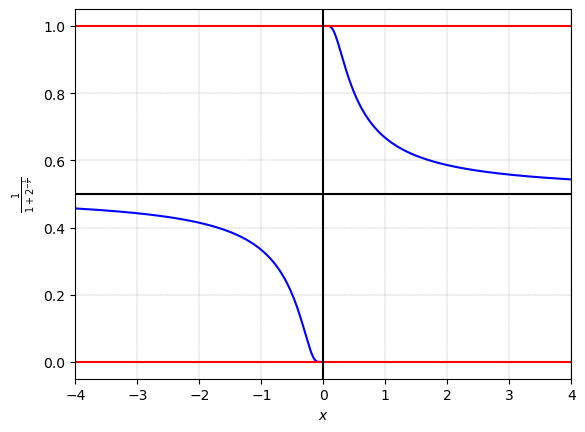

In [6]:
fig, ax = plt.subplots()  # 创建绘图窗口

ax.plot(x_array_right, f_x_array_right, linewidth=1.5, color='b')  # 绘制右侧f(x)曲线
ax.axhline(y=f_x_0_limit_right, color='r')  # 添加水平线表示右极限值

ax.plot(x_array_left, f_x_array_left, linewidth=1.5, color='b')  # 绘制左侧f(x)曲线
ax.axhline(y=f_x_0_limit_left, color='r')  # 添加水平线表示左极限值

ax.axvline(x=0, color='k')  # 添加垂直线表示x=0
ax.axhline(y=0.5, color='k')  # 添加水平线表示y=0.5

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格线
ax.set_xlim(x_array_left.min(), x_array_right.max())  # 设置x轴范围

ax.set_xlabel(r'$\it{x}$', fontname='Times New Roman')  # 设置x轴标签
ax.set_ylabel(r'$%s$' % latex(f_x), fontname='Times New Roman')  # 使用LaTeX格式化y轴标签为f(x)的表达式